# Homework 6: Hypothesis Testing and Confidence Intervals  (50 points)



Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Gradescope as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

**<u>Deadline</u>**:

This assignment is due on **Friday, February 23** at **11:59pm**. Late work will not be accepted unless it follows the specific policy of the instructor.

- Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

- You should start early so that you have time to get help if you're stuck.

- Submit your homework 30-60 minutes to ensure that it will upload before the deadline.

- Please run all of your code cells and ensure all of your answers are outputted and visible to graders.

- Check the file preview on Gradescope to make sure all of your answers are visible.

- Be mindful of your file sizes. Do not print out entire large datasets use .head or .tail instead. Make sure your document is visible in the Gradescope preview.

- Your functions should have a docstring. Points may be taken off for not including a docstring.

- Your graphs should be labeled with a title, x-label, and y-label and be otherwise readable. Intervals on x- and y-axises should make sense for the data. If these items are missing, points may be taken off.

In [1]:
# Don't change this cell; just run it.

import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. How Many Devices? (7 points) ##

When a company produces medical devices, it must be sure that its devices will not fail.  Sampling is used ubiquitously in the medical device industry to test how well devices work.

Suppose you work at a company that produces syringes, and you are responsible for ensuring the syringes work well.  After studying the manufacturing process for the syringes, you have a hunch that they have a 2% failure rate.  That is, you suspect that 2% of the syringes won't work when a doctor uses them to inject a patient with medicine.

To test your hunch, you would like to find at least one faulty syringe.  You hire an expert consultant who can test a syringe to check whether it is faulty.  But the expert's time is expensive, so you need to avoid checking more syringes than you need to.

**Important note:** This exercise asks you to compute numbers that are related to probabilities.  For all questions, you can calculate your answer using algebra, **or** you can write and run a simulation to compute an approximately-correct answer (we encourage you to try both).  An answer based on an appropriate simulation will receive full credit.  If you simulate, use at least **10,000** trials. An answer based on algebra, should contain some explanation on how the calculation was done.


**Question 1. (2pts)** Suppose there is indeed a 2% failure rate among all syringes.  If you check 50 syringes chosen at random from among all syringes, what is the chance that you find at least 1 faulty syringe? Name your answer `chance_to_find_syringe`. And display the numerical value you get as an answer. *Hint: first decide what probability distribution this situation follows*

In [2]:
outcomes = []
for i in range(10000):
    num_failed = np.random.choice(['Fail', 'Pass'], 50, p=[0.02, 0.98]).tolist().count('Fail') / 50
    outcomes.append(num_failed)

chance_to_find_syringe = np.mean(outcomes)
chance_to_find_syringe

0.019898000000000002

This follows a binomial distribution since there is a binary outcome, draws are independent, and the probability of success does nto change between draws. The chance to find a syringe is approximately 0.02021

**Question 2. (3pts)** Continue to assume that there really is a 2% failure rate. Find the smallest number of syringes you can check so that you have at least a 75% chance of finding a faulty syringe (your answer should be an integer).  Name that number `num_required_for_75_percent`.  **If you use simulation, it's okay if your answer is off by as many as 5 for full credit.**

$(0.02)^n$ is the probability of getting all faulty syringes when drawing n syringes. 

$(0.98)^n$ is the probability of getting all good syringes (no faulty)when drawing n syringes.

$1 - (0.98)^n$ is the probability of getting at least one faulty.

Explanation: If we flip a coin five times, the probability of getting all heads (HHHHH) is $(0.5)^n$.
That means the complement of NOT getting all heads is the probability of literally anything else, $1-(0.5)^n$, which will 
always include a tails (THHHH, TTTTT, HHHTH, etc.). Analogous to this, the probability of getting at least one faulty is the 
complement of the probability of getting all good syringes

In [3]:
num_required_for_75_percent = 69
num_required_for_75_percent

69

$$1-(0.98)^n >= 0.75$$
$$0.98^n >= 0.25$$
$$n >= \frac{\ln(0.25)}{\ln(0.98)} >= 68.619$$
$$n>=69$$


**Question 3. (2pts)** A doctor purchased 10 syringes and found 3 of them to be faulty. Assuming that there is indeed a 2% failure rate, what was the probability of **exactly 3** out of 10 syringes being faulty?

In [4]:
# Function defined in textbook
def binomial_prob(n, p, j):
  '''A function that calculates probabilities from a binomial distribution with parameters n and p'''
  n_choose_j = np.math.factorial(n)/(np.math.factorial(j)*np.math.factorial(n-j))
  return  n_choose_j*p**j*(1-p)**(n-j)


probability_of_two_faulty = binomial_prob(10, 0.02, 3)
probability_of_two_faulty

/var/folders/s_/fr0jyz7s5qv1_648_n3yrj940000gn/T/ipykernel_2201/1053458602.py:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  n_choose_j = np.math.factorial(n)/(np.math.factorial(j)*np.math.factorial(n-j))


0.0008334005119168512

*Answer here*

## 2. Birth weight data (23 points)

For this question we will use a dataset that contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.  The code to read the data is in the next cell, and the data file is on Canvas.


In [5]:
baby_df = pd.read_csv('baby.csv')
print(baby_df.shape)
baby_df.head(5)

(1174, 6)


,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


Body Mass Index (BMI) is a person’s weight in kilograms divided by the square of height in meters.  BMI can be used to screen for weight categories that may lead to health problems but it is not diagnostic of the health of an individual. It is becoming a less useful measure by itself: [CNet news on BMI](https://www.cnet.com/health/nutrition/your-bmi-doesnt-matter-as-much-as-you-think-heres-why/)

Here we will investigate differences in BMI between mothers who smoked and did not.

**Question 4. (2 pts)** Calculate the BMI for the mothers in this dataset and save it in a variable called `bmi`

In [6]:
baby_df['bmi'] = (baby_df['Maternal Pregnancy Weight'] * 0.453592) / (baby_df['Maternal Height'] * 0.0254) ** 2
baby_df

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker,bmi
0,120,284,27,62,100,False,18.290037
1,113,282,33,64,135,False,23.172440
2,128,279,28,64,115,True,19.739486
3,108,282,23,67,125,True,19.577551
4,136,286,25,62,93,False,17.009734
...,...,...,...,...,...,...,...
1169,113,275,27,60,100,False,19.529695
1170,128,265,24,67,120,False,18.794449
1171,130,291,30,65,150,True,24.961030
1172,125,281,21,65,110,False,18.304755


**Question 5. (4 pts)** Generate overlapping histograms of mother BMI for smokers and non-smokers. (You should make 2 histograms: one for smokers and one for non-smokers. These should be drawn on the **same plot** so that they overlap.)

Hint: Plot non-smokers first.

Interpret the plots.


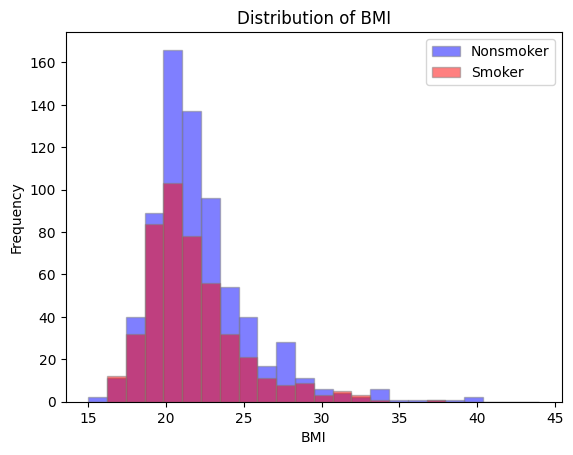

In [7]:
smoker_bmi = baby_df.loc[baby_df['Maternal Smoker'] == True, ['bmi']]

nonsmoker_bmi = baby_df.loc[baby_df['Maternal Smoker'] == False][['bmi']]

bins = np.linspace(15, 44, 25)
plt.figure()
plt.hist(nonsmoker_bmi, bins, alpha=0.5, label='Nonsmoker', edgecolor='grey', color='blue')
plt.hist(smoker_bmi, bins, alpha=0.5, label='Smoker', edgecolor='grey', color='red')
plt.legend()
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

*Comment here on the plots:* Smokers and nonsmoker have similar distributions but differ mostly in frequency.



**Question 6. (2 pts)** We want to investigate if the distributions of the BMI in mothers who smoke and mothers who do not smoke are the same.

Write the null and alternative hypotheses for this investigation based on the graphs you made above.

**Null Hypothesis:** The distributions of BMI for mothers wo smoke and mothers who don't are the same

**Alternative Hypothesis:** The distribution of BMI for mothers who smoke vs mothers who don't are different

**Question 7. (4 pts)** We will use first the following test statistic: **the difference in BMI sample means** (between smokers and non-smokers).  

Write the code that generates a null distribution for this test statistic (using shuffling/permutations) and calculate the p-value associated with this test statistic.


In [8]:
# this cell (or cells if you need more than one) contains the code for generating
# the null distribution and the p-value
means_df = baby_df.groupby('Maternal Smoker').mean()[['bmi']]
means_df

,bmi
Maternal Smoker,
False,22.193779
True,21.699109


In [9]:
observed_difference = means_df.iloc[0, 0] - means_df.iloc[1, 0]
observed_difference

0.4946699674377584

In [10]:
bmis = baby_df[['bmi']]    # turn into data frame so we can take random sample
group_labels = baby_df['Maternal Smoker'].values    # labels will be switched, so we don't need to shuffle them later

differences = np.array([])    # this will be our distribution of differnces

for i in np.arange(5000):
    shuffled_bmis = bmis.sample(len(bmis), replace=False)['bmi'].values
    shuffled_df = pd.DataFrame({
        'Shuffled bmi': shuffled_bmis,
        'Label': group_labels})    # Assign new groups
    shuffled_means_df = shuffled_df.groupby('Label').mean()
    new_diff = shuffled_means_df.iloc[0] - shuffled_means_df.iloc[1]
    differences = np.append(differences, new_diff)

differences

array([ 0.08549187, -0.17667486,  0.23037655, ...,  0.0835293 ,
       -0.16392396, -0.22766938])

Text(0, 0.5, 'Frequency')

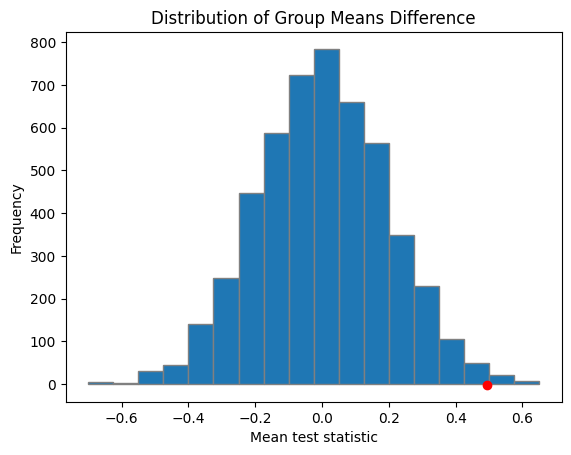

In [11]:
plt.hist(differences, bins=np.arange(-0.7, 0.7, 0.075), edgecolor='grey')
plt.scatter(observed_difference, -2, color='red')
plt.title('Distribution of Group Means Difference')
plt.xlabel('Mean test statistic')
plt.ylabel('Frequency')

In [12]:
extreme = sum(differences >= observed_difference)/5000

p_value = 2*extreme    # multiply by two to get the other side (greater differences may be negative)
p_value

0.0132

**Question 8. (4 pts)** Repeat what is asked in Question 7 for the following test statistic: **the difference in BMI sample medians**.

In [13]:
# this cell (or cells if you need more than one) contains the code for generating
# the null distribution and the p-value
medians_df = baby_df.groupby('Maternal Smoker').median()[['bmi']]
medians_df

,bmi
Maternal Smoker,
False,21.455963
True,21.033542


In [14]:
observed_med_difference = medians_df.iloc[0, 0] - medians_df.iloc[1, 0]
observed_med_difference

0.4224212549987598

In [15]:
bmis = baby_df[['bmi']]    # turn into data frame so we can take random sample
group_labels = baby_df['Maternal Smoker'].values    # labels will be switched, so we don't need to shuffle them later

med_differences = np.array([])    # this will be our distribution of differnces

for i in np.arange(5000):
    shuffled_bmis = bmis.sample(len(bmis), replace=False)['bmi'].values
    shuffled_df = pd.DataFrame({
        'Shuffled bmi': shuffled_bmis,
        'Label': group_labels})    # Assign new groups
    shuffled_medians_df = shuffled_df.groupby('Label').median()
    new_diff = shuffled_medians_df.iloc[0] - shuffled_medians_df.iloc[1]
    med_differences = np.append(med_differences, new_diff)

med_differences

array([ 0.        , -0.04356486,  0.16136648, ..., -0.04356486,
       -0.0432683 ,  0.02750515])

Text(0, 0.5, 'Frequency')

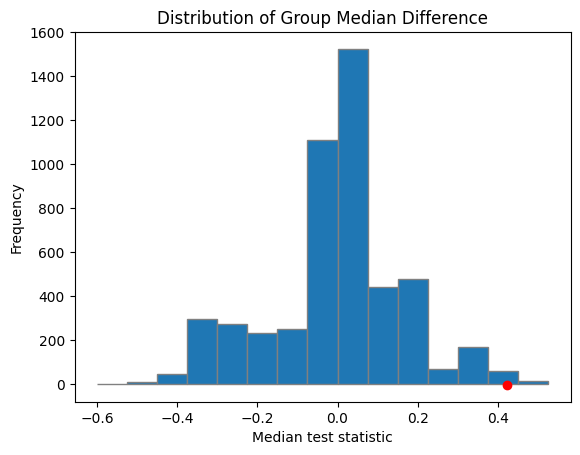

In [16]:
plt.hist(med_differences, bins=np.arange(-0.6, 0.6, 0.075), edgecolor='grey')
plt.scatter(observed_med_difference, -2, color='red')
plt.title('Distribution of Group Median Difference')
plt.xlabel('Median test statistic')
plt.ylabel('Frequency')

In [17]:
med_extreme = sum(med_differences >= observed_med_difference)/5000

med_p_value = 2*med_extreme    # multiply by two to get the other side (greater differences may be negative)
med_p_value

0.0212

**Question 9. (4 pts)** Repeat what is asked in Question 7 for the following test statistic: **the difference in BMI sample standard deviations**.

In [18]:
# this cell (or cells if you need more than one) contains the code for generating
# the null distribution and the p-value
std_df = baby_df.groupby('Maternal Smoker').std()[['bmi']]
std_df

,bmi
Maternal Smoker,
False,3.290454
True,3.097138


In [19]:
observed_std_difference = std_df.iloc[0, 0] - std_df.iloc[1, 0]
observed_std_difference

0.1933157560860086

In [20]:
bmis = baby_df[['bmi']]    # turn into data frame so we can take random sample
group_labels = baby_df['Maternal Smoker'].values    # labels will be switched, so we don't need to shuffle them later

std_differences = np.array([])    # this will be our distribution of differnces

for i in np.arange(5000):
    shuffled_bmis = bmis.sample(len(bmis), replace=False)['bmi'].values
    shuffled_df = pd.DataFrame({
        'Shuffled bmi': shuffled_bmis,
        'Label': group_labels})    # Assign new groups
    shuffled_std_df = shuffled_df.groupby('Label').std()
    new_diff = shuffled_std_df.iloc[0] - shuffled_std_df.iloc[1]
    std_differences = np.append(std_differences, new_diff)

std_differences

array([-0.0192072 , -0.36682037, -0.0461318 , ...,  0.14780504,
       -0.46484092, -0.08489613])

Text(0, 0.5, 'Frequency')

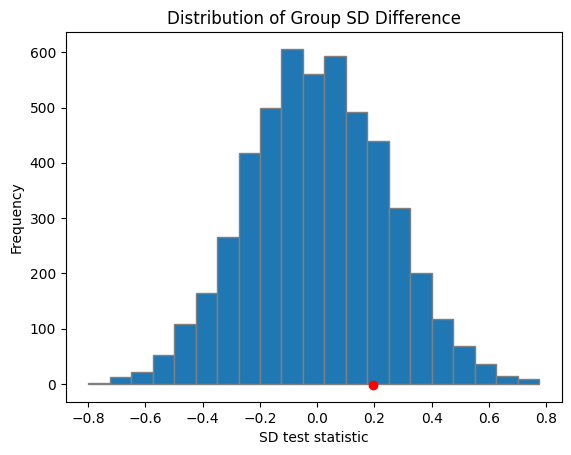

In [21]:
plt.hist(std_differences, bins=np.arange(-0.8, 0.8, 0.075), edgecolor='grey')
plt.scatter(observed_std_difference, -2, color='red')
plt.title('Distribution of Group SD Difference')
plt.xlabel('SD test statistic')
plt.ylabel('Frequency')

In [22]:
std_extreme = sum(std_differences >= observed_std_difference)/5000

p_value = 2*std_extreme
p_value

0.4336

**Question 10. (3 pts)** Write a very brief discussion on the interpretation of the 3 p-values you calculated.

At the 0.05 significance level:

**Mean:** The P-value = 0.008 means that we reject the null hypothesis that the mean bmi between smoker and nonsmoker moms are the same. There is statistically significant evidence that the means differ.

**Median:** The P-value of 0.0232 means that we reject the null hypothesis that the median bmi for smoking mothers is the same as that for nonsmoking mothers. There is statistically significant evidence that the medians differ between the two groups.

**Standard Deviation:** The P-value of 0.436 means that we reject the null hypothesis that the standard deviation for bmi for smoking mothers is the same as that for nonsmoking mothers. There is statistically significant evidence that the standard deviations differ between the two groups.


## 3. Plot the Vote (20 points) ##

The presidential election in the US is coming up this year!! Let's celebrate this with a homework question!

Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate A | 0.43 |
|Candidate B | 0.35 |
|Candidate C | 0.10 |
|Candidate D | 0.05 |
|Undecided   | 0.07 |

These proportions represent a simple random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters* - the proportions of each kind of voter in the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [45]:
votes = pd.DataFrame({'vote': np.array(['A']*430 + ['B']*350 + ['C']*100 + ['D']*50 + ['U']*70)})
num_votes = len(votes)
votes.sample(5,replace=True)

,vote
944,U
906,D
662,B
333,A
264,A


Below, we have given you code that will use bootstrapped samples to compute estimates of the true proportion of voters who are planning on voting for **Candidate B**.

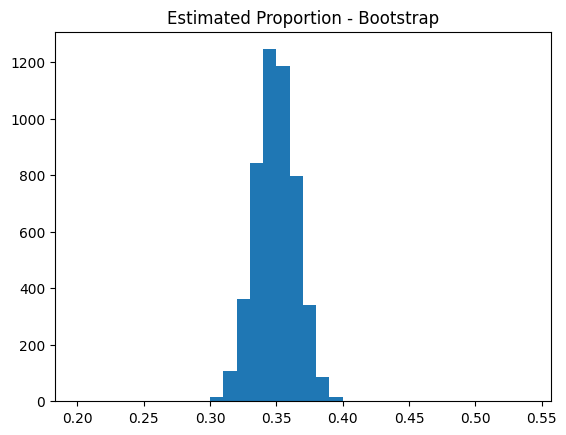

array([0.349, 0.328, 0.346, ..., 0.347, 0.371, 0.343])

In [46]:
def proportions_in_resamples(nboot):
    statistics = np.array([])
    for i in np.arange(nboot):
        bootstrap = votes.sample(num_votes,replace=True)
        sample_statistic = np.count_nonzero(bootstrap.vote == 'B')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_proportions = proportions_in_resamples(5000)

plt.hist(sampled_proportions,bins=np.arange(0.2,0.55,0.01))
plt.title("Estimated Proportion - Bootstrap")
plt.show()

sampled_proportions

**Question 11. (6pts)** Using the array `sampled_proportions`, compute a **basic boostrap 98% confidence interval** for the difference in the true and bootstrapped proportions of voters planning on voting for candidate B.

In [61]:
b_lower_bound = np.percentile(sampled_proportions-0.35, 1.0)
b_upper_bound = np.percentile(sampled_proportions-0.35, 99.0)
low_ci = 472/2385 - b_upper_bound
up_ci = 472/2385 - b_lower_bound
print("Bootstrapped 98% confidence interval for the proportion of B voters in the population: [{:f}, {:f}]".format(low_ci, up_ci))

Bootstrapped 98% confidence interval for the proportion of B voters in the population: [0.162904, 0.232904]


**Question 12. (6pts)** The survey results seem to indicate that Candidate B is losing to Candidate A among voters. We would like to use CI's to determine a range of likely values for Candidate A's true *lead*. Candidate A's lead over Candidate B is:

$$\text{Candidate A's proportion of the vote} - \text{Candidate B's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate A's lead over Candidate B. Plot a histogram of the the resulting samples.

Also calculate a **95% percentile bootstrap confidence interval** for the difference.

Text(0, 0.5, 'Frequency')

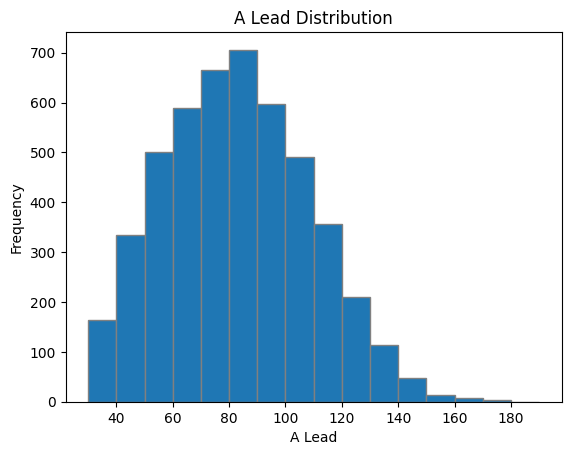

In [58]:
# the code for the histogram is here
def a_leads_in_resamples(nboot):
    statistics = np.array([])
    for i in np.arange(nboot):
        bootstrap = votes.sample(num_votes,replace=True)
        sample_statistic = ((np.count_nonzero(bootstrap.vote =='A')) - (np.count_nonzero(bootstrap.vote == 'B')))
        statistics = np.append(statistics, sample_statistic)
    return statistics

a_leads = a_leads_in_resamples(5000)

plt.hist(a_leads, bins=np.arange(30, 200, 10), edgecolor='grey')
plt.title('A Lead Distribution')
plt.xlabel('A Lead')
plt.ylabel('Frequency')

In [63]:
# the bootstrap confidence interval
observed_a_lead = (0.43 - 0.35) * 1000
diff_lower_bound = observed_a_lead - np.percentile(a_leads - observed_a_lead, 97.5)
diff_upper_bound = observed_a_lead - np.percentile(a_leads - observed_a_lead, 2.5)
print("Bootstrapped 95% confidence interval for Candidate A's true lead over Candidate B: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Candidate A's true lead over Candidate B: [26.000000, 135.000000]


**Question 13. (3pts)** Interpret the 95% interval you obtained. What does it tell you about the lead Candidate A has?

If we were to complete the process of taking bootstrap samples from the original samples and constructed an basic bootstrap confidence interval with the same method a number of times, about 95% of those intervals contain the true population lead of Candidate A. With 95% confidence, the true lead of Candidate A is between 26 and 135 votes  

**Question 14. (3pts)** Suppose your friend computes the following 99% confidence interval for the proportion of Candidate B voters:

$$[.41, .49]$$

(If you do this yourself, your answer might be different; that doesn't mean it is wrong.)

Can we say that 99% of the population lies in the range $[.41, .49]$? Explain your answer.

No we cannot say that. If we were to construct an interval with the same method as them a number of times, 99% of those intervals will contain the true population proportion of Candidate B voters. The 99% is capturing the accuracy of the **method** of creating the confidence interval, not a single confidence interval we create. We take note of this by instead saying we are 99% **confident** that the true population proportion of Candidate B votes is between .41 and .49.


**Question 15. (2pts)** Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) and created a 99% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population?

We expect roughly 99% of those confidence intervals to actually contain the truo proportion of the population.